<a href="https://colab.research.google.com/github/akash2704/Handwritten-text-detection-in-tensorflow-using-CNN-model/blob/main/Handwritten_text_detection_in_tensorflow_using_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install opencv-python
!pip install matplotlib

In [2]:
import tensorflow as tf


In [3]:
minst=tf.keras.datasets.mnist

In [4]:
(x_train, y_train),(x_test,y_test)=minst.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

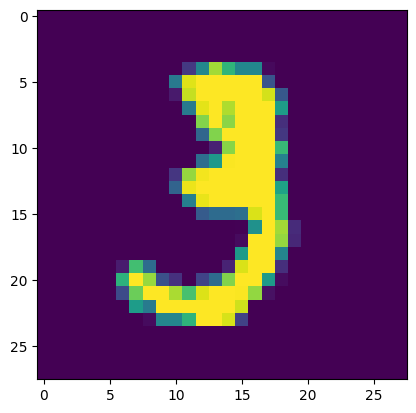

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10])
plt.show()
#plt.imshow(x_train[10],cmap=plt.cm.binary)

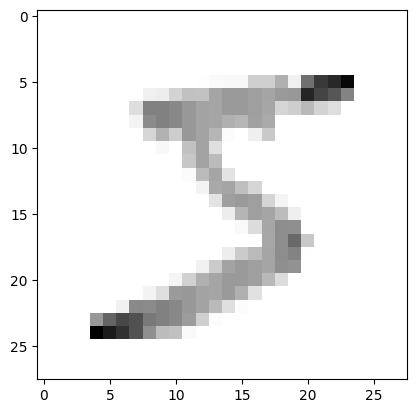

In [8]:
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [16]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_test=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(x_trainr.shape)
print(x_testr.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation, Dropout, Flatten, Conv2D , MaxPooling2D

In [11]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(len(x_trainr))

60000


In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 69s 51ms/step - accuracy: 0.7630 - loss: 0.6943 - val_accuracy: 0.9521 - val_loss: 0.1502
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.9657 - loss: 0.1085 - val_accuracy: 0.9721 - val_loss: 0.0922
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.9764 - loss: 0.0760 - val_accuracy: 0.9789 - val_loss: 0.0721
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9831 - loss: 0.0556 - val_accuracy: 0.9714 - val_loss: 0.0999
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 86s 53ms/step - accuracy: 0.9853 - loss: 0.0471 - val_accuracy: 0.9743 - val_loss: 0.0892


In [17]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9713 - loss: 0.1002
Test Loss: 0.07866431772708893
Test Accuracy: 0.977400004863739


In [18]:
use_sparse = True
# 3️⃣ Predictions
y_pred_probs = model.predict(x_testr)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

if not use_sparse:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


array([[7.76605589e-08, 7.74653563e-06, 6.25213897e-06, ...,
        9.99973238e-01, 1.11887380e-06, 1.84422632e-07],
       [6.61125779e-03, 4.38551542e-05, 9.91616368e-01, ...,
        6.49668218e-05, 1.49341207e-03, 8.24976451e-06],
       [1.19036585e-07, 9.99999344e-01, 4.97391170e-07, ...,
        3.11840154e-08, 4.69647654e-09, 3.09454116e-08],
       ...,
       [9.55685220e-09, 1.02051388e-06, 4.54160478e-08, ...,
        1.19448416e-07, 2.66726852e-06, 4.04292493e-08],
       [8.34327657e-05, 1.59201406e-07, 2.07928963e-08, ...,
        9.70487579e-11, 2.79039177e-05, 6.54598671e-06],
       [1.47691944e-05, 3.74740843e-08, 6.58032604e-06, ...,
        3.34105899e-08, 4.25096096e-06, 3.36899166e-06]], dtype=float32)